In [19]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

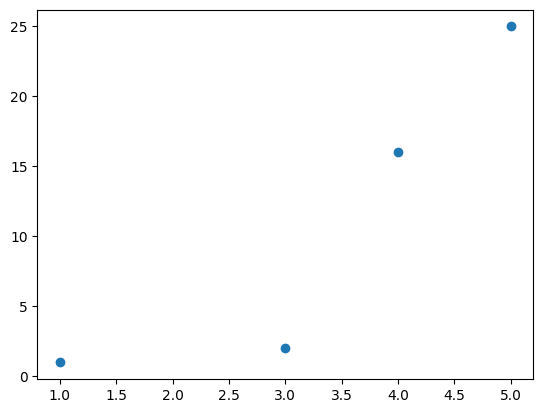

In [32]:
points = np.array([[1, 1], [3,2], [4,16], [5, 25]])

plt.scatter([i[0] for i in points], [i[1] for i in points])

In [33]:
points.shape

(4, 2)

In [34]:
def divided_difference(points):
    x, y = points[:, 0], points[:, 1]
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = (
                (diff_table[i + 1][j - 1] - diff_table[i][j - 1]) 
                / (x[i + j] - x[i]))

    return diff_table[0, :]

def newton_poly(coeffs, x_j, x):
    n = len(coeffs) - 1
    poly = coeffs[n]
    for k in range(1, n + 1):
        poly = coeffs[n - k] + (x - x_j[n - k]) * poly
    return poly

def newton_interpolation(points, X): 
    x_j, y_j = points[:, 0], points[:, 1]
    coeffs = divided_difference(points)
    return np.array([newton_poly(coeffs, x_j, x) for x in X])

def newton_poly_string(coeffs, x_data):
    n = len(coeffs)
    polynomial_str = f"{coeffs[0]:.4f}"  # Start with a_0
    
    for i in range(1, n):
        term = f"{coeffs[i]:+.4f}"
        for j in range(i):
            term += f"(x - {x_data[j]:.4f})"
        polynomial_str += " " + term

In [35]:
def newton_poly_equation(coeffs, x_data):
    x = sp.symbols('x')
    n, poly = len(coeffs), coeffs[0]

    for i in range(1, n):
        term = coeffs[i]
        for j in range(i):
            term *= (x - x_data[j])
        poly += term
    return sp.simplify(poly)

coeffs = divided_difference(points)

print("y =", newton_poly_equation(coeffs, points[:, 0]))


y = -1.75*x**3 + 18.5*x**2 - 50.75*x + 35.0


In [36]:
def lagrange_basis(x_data, i, x):
    n = len(x_data)
    L_i = 1
    for j in range(n):
        if j != i:
            L_i *= (x - x_data[j]) / (x_data[i] - x_data[j])
    return L_i

def lagrange_interpolation(points, X):
    x_j, y_j = points[:, 0], points[:, 1]
    n = len(x_j)
    y = np.zeros_like(X, dtype=float)

    for i in range(n):
        y += y_j[i] * lagrange_basis(x_j, i, X)

    return y

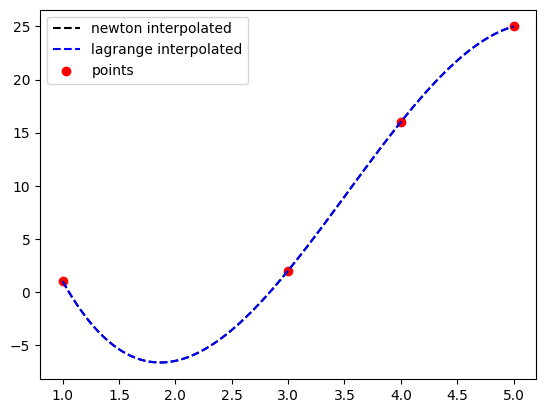

In [37]:
X = np.linspace(1, 5, 100)

plt.plot(X, lagrange_interpolation(points, X), 'k--', label = "newton interpolated")
plt.plot(X, newton_interpolation(points, X), 'b--', label = "lagrange interpolated")
plt.scatter(points[:, 0], points[:, 1], c='r', label = "points")

plt.legend()
plt.show()